# Exploring Image Transforms

Pytorch's library `torchvision` has a whole array of [well documented](https://pytorch.org/docs/master/torchvision/transforms.html) image transform functions.
In this notebook, we'll take a look at how we can use the sconce [DataFeed](https://davidlmorton.github.io/pytorch-sconce/data_feeds.html#sconce.data_feeds.DataFeed) to see how images look when transformed.

In [1]:
import sconce
print(f"Notebook run using pytorch-sconce version: {sconce.__version__}")

Notebook run using pytorch-sconce version: 1.2.1


## Plotting transforms

First we build up the composite transform out of individual transform functions.
Then we hand that composite transform function to the Dataset's constructor.
Finally, we use the `plot_transforms` method to visualize the effects of the transforms on an image.
Note how the transformed images are not the same size (in pixels) even though they appear the same size on the screen.

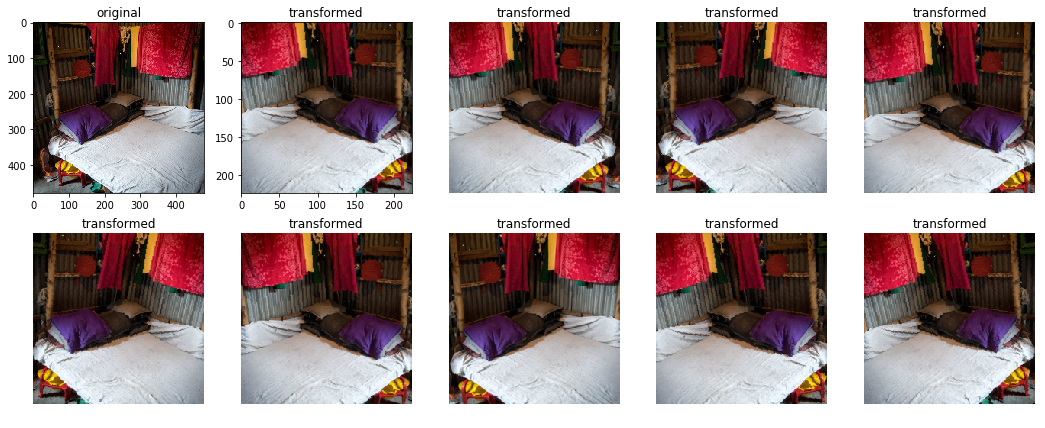

In [2]:
from sconce.datasets import CsvImageFolder
from sconce.data_feeds import ImageFeed
from torchvision import transforms
import torch

image_size = 224
composite_transform = transforms.Compose([
    transforms.Resize(int(image_size*1.15)),
    transforms.RandomAffine(degrees=(0,10), translate=(0.02, 0.02), scale=(1.0, 1.1)),
    transforms.RandomHorizontalFlip(),
    transforms.CenterCrop(image_size),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.0], std=[1.0])
])

dataset_kwargs = dict(root='data', 
                      csv_path='metadata/data.tsv',
                      csv_delimiter='\t',
                      filename_key='filename',
                      classes_key='value',
                      target_transform=torch.Tensor)
    
dataset = CsvImageFolder(transform=composite_transform, **dataset_kwargs)

feed = ImageFeed.from_dataset(dataset)
feed.plot_transforms(index=1, num_samples=10)

## Interactively setting transform parameters

Some of the parameters of tranform functions are a little bit hard to understand.
By visualizing them interactively we can get a better idea of "reasonable" values for these parameters.

In [3]:
from ipywidgets import interact, Layout
import ipywidgets as widgets

def show_transforms(index,
                    num_samples=10,
                    horizontal_flip=0.0, 
                    degrees=(0, 10),
                    translate=(0.02, 0.02),
                    scale=(1.0, 1.1),
                    initial_upscale=1.15,
                    image_size=224):
    composite_transform = transforms.Compose([
        transforms.Resize(int(image_size*initial_upscale)),
        transforms.RandomAffine(degrees=degrees, translate=translate, scale=scale),
        transforms.RandomHorizontalFlip(horizontal_flip),
        transforms.CenterCrop(image_size),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.0], std=[1.0])
    ])

    feed.dataset.transform = composite_transform
    feed.plot_transforms(index, num_samples=num_samples)
    
    
# show some interactive widgets that let us play around with different values.
interact(show_transforms,
         index=widgets.IntText(181),
         horizontal_flip=(0.0, 1.0, 0.1),
         initial_upscale=(1.0, 1.5, 0.05),
         degrees=widgets.FloatRangeSlider(value=[0, 10], min=0.0, max=45,
                                        step=1,
                                        continuous_update=False,
                                        layout=Layout(width='90%')),
         translate=widgets.FloatRangeSlider(value=[0.02, 0.02], min=0.0, max=0.4,
                                        step=0.01,
                                        continuous_update=False,
                                        layout=Layout(width='90%')),
         scale=widgets.FloatRangeSlider(value=[1.0, 1.1], min=1.0, max=3.0,
                                        step=0.01,
                                        continuous_update=False,
                                        layout=Layout(width='90%')));


interactive(children=(IntText(value=181, description='index'), IntSlider(value=10, description='num_samples', …